## Qiskit으로 양자 회로 만들기

다음의 문서를 참고해 봅시다. `qiskit.circuit.library` [document](https://docs.quantum.ibm.com/api/qiskit/circuit_library).

먼저 다음의 과정을 살펴 봅시다. 가장 단순한 양자 회로를 짜는 과정입니다. 아무것도 안하는 회로를 짜는 것이죠.

In [1]:
!pip install qiskit qiskit-aer

In [2]:
import qiskit

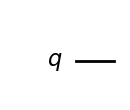

In [3]:
from qiskit import QuantumCircuit # Qiskit 에서 Quantumcircuit 이라는 Class를 받아옵니다.
qc = QuantumCircuit(1, name="First circuit") # Qubit 1 개 양자 회로 정의하기
qc.draw("mpl") # 그리기

In [4]:
qc.draw()

q:

앞으로 여러분이 Qiskit을 사용하면, 많이 쓸 코드입니다.

1. 양자회로를 만들고
2. 그 회로의 모양을 출력하는 것이죠.

간단하게 `X`라는 양자 게이트를 적용해 봅시다.

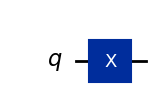

In [5]:
qc.x(0)
qc.draw("mpl")

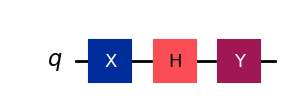

In [6]:
qc.h(0)
qc.y(0)
qc.draw("mpl")

In [7]:
qc.kfajs

AttributeError: 'QuantumCircuit' object has no attribute 'kfajs'

그리고 이 녀석을 측정해 봅시다.

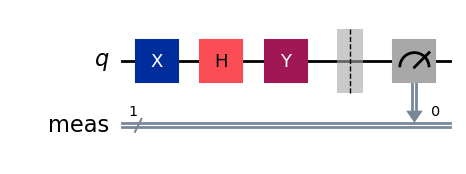

In [8]:
qc.measure_all() #
qc.draw("mpl")

위 회로에서 여러분은 어떤 결과를 얻을까요? 지금은 이후에 측정 단원에서 이를 알아보고 지금은 양자 회로를 짜는 예시를 더 살펴봅시다.

$$\begin{cases}
State      &-& 1st &- & 2nd &\\   
--&--&--&--&--&\\
|0 \rangle &-& H   &- & X   &\\ 
|0 \rangle &-& X   &- & Y   &\\ 
|0 \rangle &-& H   &- & RX  &\\ 
|0 \rangle &-& RYY &- & P   &\\ 
|0 \rangle &-& Z   &- & H   & 
\end{cases}
$$

## 2 개 qubit

Qubit 하나만 사용하는 건 너무 간단하니 여러개를 사용해 봅시다.
그리고 몇가지 gate를 소개해 두겠습니다.

1. X: `qc.x( {i-th} )`
2. Z: `qc.z( {i-th} )`
3. H: `qc.h( {i-th} )`
4. CNOT: `qc.cx(i, j)`

### X

X gate는 행렬로 표기하면 다음과 같습니다.

$$\begin{bmatrix}0 & 1\\ 1 & 0\end{bmatrix}$$

$$\begin{bmatrix}0 & 1\\ 1 & 0\end{bmatrix} \begin{bmatrix}1\\ 0\end{bmatrix} = \begin{bmatrix}0\\ 1\end{bmatrix}$$
$$\begin{bmatrix}0 & 1\\ 1 & 0\end{bmatrix} \begin{bmatrix}0\\ 1\end{bmatrix} = \begin{bmatrix}1\\ 0\end{bmatrix}$$

즉,

$$| 0 \rangle \rightarrow | 1 \rangle, | 1 \rangle \rightarrow | 0 \rangle$$

을 만들어주는 gate입니다. NOT gate라고도 부릅니다. 1을 0으로 0을 1로 바꾸어주기 때문이죠.

다음의 벡터에 X gate를 가해주면 어떤 벡터가 나올까요? 말해보세요.

- $\frac{1}{2}(|0\rangle + |1 \rangle)$
- $\frac{3}{5}|0\rangle + \frac{4}{5}||1 \rangle$

### H

H gate는 Hadamard(아다마르) 게이트라 부릅니다. 양자 컴퓨팅에서 가장 중요한 기초 게이트들 중 하나이죠.
행렬료 표기하면,

$$\frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1\\ 1 & -1\end{bmatrix}$$

X gate와 같이 $|0>, |1>$ 에 적용해 봅시다.

$$\frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1\\ 1 & -1\end{bmatrix} \begin{bmatrix} 1 \\ 0\end{bmatrix} = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ 1\end{bmatrix}
= \frac{1}{\sqrt{2}} (|0> + |1>)$$
$$\frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1\\ 1 & -1\end{bmatrix} \begin{bmatrix} 0 \\ 1\end{bmatrix} = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ -1\end{bmatrix}
= \frac{1}{\sqrt{2}} (|0> - |1>)$$

각각에 적용했더니 2가지 상태가 모드 함께 있는 상태가 나왔습니다. 
가장 중요한 기초 게이트인 이유가 이것입니다. 아다마르 게이트를 이용하면, Qubit이 일반 Bit와는 구별되는 중첩 상태를 만들 수 있기 때문입니다.

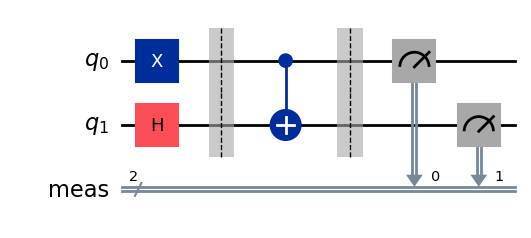

In [9]:
qc2 = QuantumCircuit(2)
qc2.x(0)
qc2.h(1)
qc2.barrier([0, 1])
qc2.cx(0, 1)
qc2.measure_all()
qc2.draw("mpl")

## 양자회로에서 값 얻어보기

이제 양자 회로를 짜는 방법을 알아봤습니다.
이 회로에서 값을 얻어봅시다. 다음의 과정을 거칩니다.

1. 만든 양자 회로를 `transpile`을 거쳐 Simulator에 맞는 조합으로 바꾸기
2. Simulator에서 값을 계산하기

In [10]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

In [11]:
# Transpile for simulator
simulator = AerSimulator()
circ = transpile(qc2, simulator) #

# Run and get counts
result = simulator.run(circ).result()
counts = result.get_counts(circ)

In [12]:
qc2.draw()

┌───┐ ░       ░ ┌─┐   
   q_0: ┤ X ├─░───■───░─┤M├───
        ├───┤ ░ ┌─┴─┐ ░ └╥┘┌─┐
   q_1: ┤ H ├─░─┤ X ├─░──╫─┤M├
        └───┘ ░ └───┘ ░  ║ └╥┘
meas: 2/═════════════════╩══╩═
                         0  1

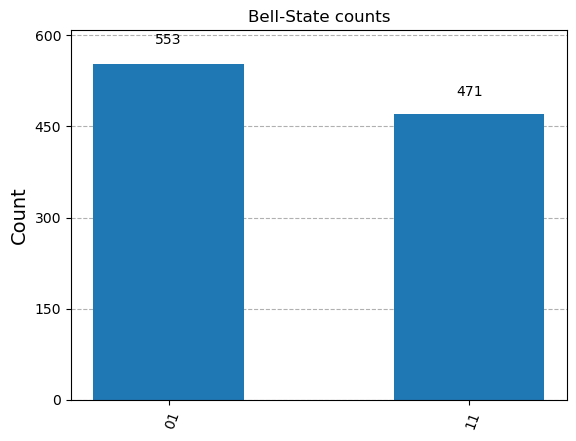

In [9]:
plot_histogram(counts, title='Bell-State counts')

# 요약

양자회로를 짜고 측정하는 과정은 아래와 같이 이루어집니다.

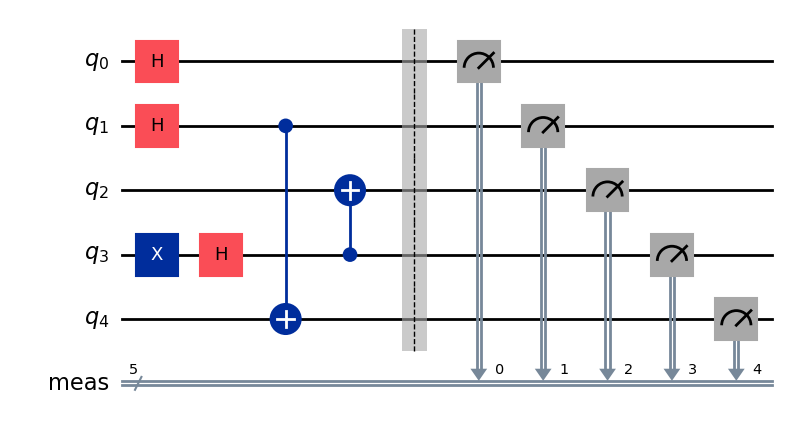

In [30]:
# 1. Qubit을 몇개를 쓸 지 정의합니다.
qc = QuantumCircuit(5) # 우린 5개를 사용해보죠.
# 2. 양자 게이트들을 회로에 적용해 봅니다.
# ----- 이렇게 생긴 Circuit을 만들어 봅시다.
qc.x(3)
qc.h(0)
qc.h(1)
qc.h(3)
qc.cx(3, 2)
qc.cx(1, 4)
qc.measure_all()
# 3. `qc.draw()` 로 circuit을 확인해 봅시다.
qc.draw("mpl")

In [31]:
# 4. 양자 회로를 돌릴 기기를 가져옵시다. 여기서는 Simulator입니다.
simulator = AerSimulator()
# 5. 우리가 만든 회로를 기기에 맞게 변형시켜 줍니다.
circ = transpile(qc, simulator)
# 6. 회로를 돌려서 결과를 얻읍시다.
result = simulator.run(circ).result()


In [32]:
# 7. 결과에서 다양한 값을 얻어 볼 수 있습니다.
counts = result.get_counts(circ)

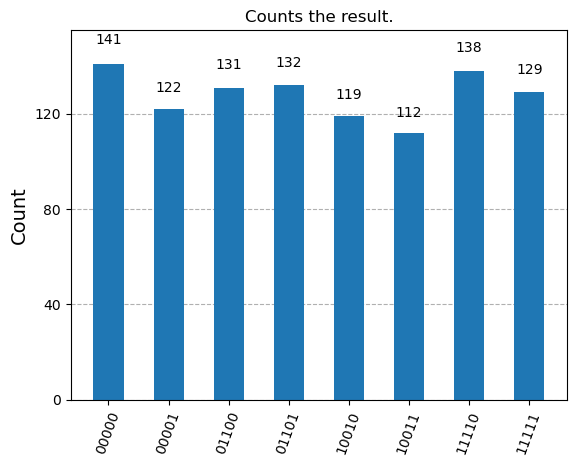

In [33]:
plot_histogram(counts, title='Counts the result.')

## 해보기

1. Qubit 2개를 쓴 회로를 만들어보세요, X, H, CNOT 3개를 조합해, (00, 11)이나 (10, 01) 만이 측정되는 회로를 만들어봅시다.
2. 3개 qubit에서 (000, 111)만 측정되는 회로를 만들어봅시다.
3. 위에서 말한 게이트 외에 다양한 게이트가 있습니다. Qiskit 홈페이지에서 gate를 찾아보고 적용해 본 뒤, 어떤 변화가 생기는 지 말해 보세요. 어떤 게이트는 qubit이 1개 일때는 별 영향이 없다가 2개 이상이면 영향이 생기는 것도 있습니다.

---

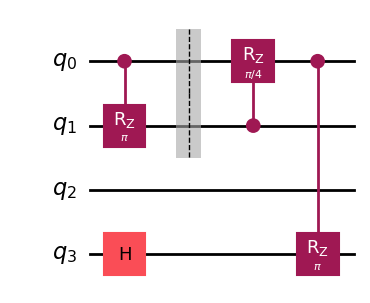

In [7]:
from qiskit.circuit.library import CRZGate
import numpy as np
crz_t1 = CRZGate(np.pi)

qc= QuantumCircuit(4)
qc.append(crz_t1, [0, 1])

qc.barrier([0,1])

qc.append(CRZGate(np.pi/4), [1, 0])
qc.h(3)
qc.append(crz_t1, [0, 3])
qc.draw("mpl")


In [5]:
# Get basic gates
from qiskit.circuit.library import HGate, CXGate
from qiskit import QuantumCircuit

HG = HGate()

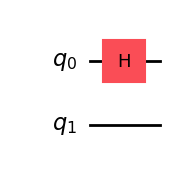

In [6]:
qc = QuantumCircuit(2) # number of qubits
qc.append(HG, [0])
qc.draw('mpl')

In [4]:
qc.draw()

┌───┐
q_0: ┤ H ├
     └───┘
q_1: ─────

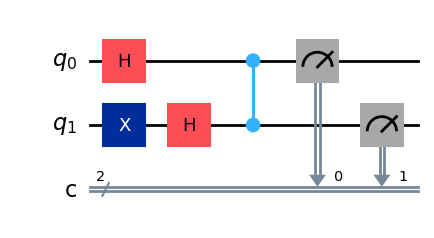

In [16]:
# Some standard gates inherited in circuit.
qc = QuantumCircuit(2, 2) # 2 qubit, 2 classic bit
qc.x(1)
qc.h(range(2))
qc.cz(0, 1)
qc.measure([0,1], [0, 1])
qc.draw('mpl')

### Gate and matrix

In [37]:
from qiskit.circuit.library import (
    XGate, YGate, ZGate,
    TGate, SGate, HGate, 
    RXGate, RZGate, RYGate,
    CXGate, CZGate)
X = XGate()
Y = YGate()
Z = ZGate()
T = TGate()
S = SGate()
H = HGate()

## Matrix representation

The all gate on the circuit and also the ciruit itself a giant unitary matrix.
We can transform the gate into matrix form and the given matrix into the gate.

In [38]:
# numpy
# Each gate in Qiskit library are 
# itself compatible with numpy routine.
np.matrix(X), np.matrix(T)

(matrix([[0.+0.j, 1.+0.j],
         [1.+0.j, 0.+0.j]]),
 matrix([[1.        +0.j        , 0.        +0.j        ],
         [0.        +0.j        , 0.70710678+0.70710678j]]))

In [39]:
# Gate subroutine
# Qiskit provides matrix representation which is embeded in the Gate class.
X.to_matrix() 

array([[0.+0.j, 1.+0.j],
       [1.+0.j, 0.+0.j]])

In [40]:
H.to_matrix()

array([[ 0.70710678+0.j,  0.70710678+0.j],
       [ 0.70710678+0.j, -0.70710678+0.j]])

In [41]:
(1/np.sqrt(2))*np.matrix([
    [1,1],
    [1,-1]
])

matrix([[ 0.70710678,  0.70710678],
        [ 0.70710678, -0.70710678]])

### Gate power

Single gate can be decomposed to several gates

$$U = (U^{1/n})^n$$

The $n$ could be real number. It does not have to be integer in all case.
Qiskit provides the `power()` routine to decompose the single gate and reversely, the method can compose the several iterative gate.

In [29]:
X.to_matrix()

array([[0.+0.j, 1.+0.j],
       [1.+0.j, 0.+0.j]])

In [30]:
X1_3 = X.power(1/3).to_matrix() # (X)^{1/3}
X1_3@X1_3@X1_3

array([[-9.33118602e-16-2.12152338e-16j,  1.00000000e+00-1.20914569e-16j],
       [ 1.00000000e+00-1.03718708e-16j, -6.44407220e-16+4.09030040e-16j]])

In [31]:
X3 = X.power(3).to_matrix() # X^3, it must be X
X3

array([[0.+0.j, 1.+0.j],
       [1.+0.j, 0.+0.j]])

## Circuit to gate

As we first mentioned, a circuit itself a giant uniatry gate.
Qiskit provides a routine to convert the circuit into the single gate.

For example, let's implement a tensor product of several matrix with circuit.

In [66]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import HGate, XGate
from qiskit.quantum_info import Operator # For the ciruit to matrix
from scipy.linalg import kron as tensor_product

In [46]:
h = HGate().to_matrix()
x = XGate().to_matrix()

In [47]:
tensor_product(h, x)

array([[ 0.        +0.j,  0.70710678+0.j,  0.        +0.j,
         0.70710678+0.j],
       [ 0.70710678+0.j,  0.        +0.j,  0.70710678+0.j,
         0.        +0.j],
       [ 0.        +0.j,  0.70710678+0.j, -0.        +0.j,
        -0.70710678+0.j],
       [ 0.70710678+0.j,  0.        +0.j, -0.70710678+0.j,
        -0.        +0.j]])

In [64]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.draw()

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ X ├
     └───┘

In [68]:
# The circuit has a routine 'to_matrix'.

Operator(qc).to_matrix()

array([[ 0.        +0.j,  0.        +0.j,  0.70710678+0.j,
         0.70710678+0.j],
       [ 0.        +0.j,  0.        +0.j,  0.70710678+0.j,
        -0.70710678+0.j],
       [ 0.70710678+0.j,  0.70710678+0.j,  0.        +0.j,
         0.        +0.j],
       [ 0.70710678+0.j, -0.70710678+0.j,  0.        +0.j,
         0.        +0.j]])

### Tensor Product

## Hamiltonian

In [23]:
from qiskit.circuit.library import HamiltonianGate
import numpy as np
from scipy.linalg import expm

In [21]:
H = np.matrix([
    [0, 1, 4, 7],
    [1, 0, 5, 3],
    [4, 5, 0, 1],
    [7, 3, 1, 0]
    ], dtype=complex)
t = 0.2
hgate = HamiltonianGate(H, t)

In [25]:
# Scipy matrix exponential.
expm(-1j*H*t)

array([[ 0.04380594+0.12558268j, -0.56921777-0.05412968j,
        -0.13590766-0.28229904j, -0.03772989-0.74550919j],
       [-0.56921777-0.05412968j,  0.48049057+0.10873281j,
        -0.05412736-0.61527073j, -0.14470045-0.16715571j],
       [-0.13590766-0.28229904j, -0.05412736-0.61527073j,
         0.38177938+0.12137779j, -0.59736931-0.05486675j],
       [-0.03772989-0.74550919j, -0.14470045-0.16715571j,
        -0.59736931-0.05486675j,  0.14246547+0.11728763j]])

In [26]:
hgate.to_matrix()

array([[ 0.04380594+0.12558268j, -0.56921777-0.05412968j,
        -0.13590766-0.28229904j, -0.03772989-0.74550919j],
       [-0.56921777-0.05412968j,  0.48049057+0.10873281j,
        -0.05412736-0.61527073j, -0.14470045-0.16715571j],
       [-0.13590766-0.28229904j, -0.05412736-0.61527073j,
         0.38177938+0.12137779j, -0.59736931-0.05486675j],
       [-0.03772989-0.74550919j, -0.14470045-0.16715571j,
        -0.59736931-0.05486675j,  0.14246547+0.11728763j]])

from cir

## Measurement

In [ ]:
from qiskit import execute, Aer, transpile
aer_state_sim = Aer.get_backend('statevector_simulator') # Simulator

In [ ]:
job = execute(qc, aer_state_sim) 
psi = job.result().get_statevector(qc) # Get state vector

$$\langle \psi | H | \psi \rangle$$

## Drawing a circuit

See details in `Visualize circuits`.


In [69]:
from qiskit import QuantumCircuit

In [71]:
# Prepare circuit
qc = QuantumCircuit(3)
qc.h([0, 1])
qc.x([2])
qc.rx(0.5, [0])
qc.cx(0, 1)
qc.measure_all()

In [72]:
# ASCII code
qc.draw()

┌───┐┌─────────┐      ░ ┌─┐      
   q_0: ┤ H ├┤ Rx(0.5) ├──■───░─┤M├──────
        ├───┤└─────────┘┌─┴─┐ ░ └╥┘┌─┐   
   q_1: ┤ H ├───────────┤ X ├─░──╫─┤M├───
        ├───┤           └───┘ ░  ║ └╥┘┌─┐
   q_2: ┤ X ├─────────────────░──╫──╫─┤M├
        └───┘                 ░  ║  ║ └╥┘
meas: 3/═════════════════════════╩══╩══╩═
                                 0  1  2

In [73]:
print(qc) #QC itself has a string representation.

        ┌───┐┌─────────┐      ░ ┌─┐      
   q_0: ┤ H ├┤ Rx(0.5) ├──■───░─┤M├──────
        ├───┤└─────────┘┌─┴─┐ ░ └╥┘┌─┐   
   q_1: ┤ H ├───────────┤ X ├─░──╫─┤M├───
        ├───┤           └───┘ ░  ║ └╥┘┌─┐
   q_2: ┤ X ├─────────────────░──╫──╫─┤M├
        └───┘                 ░  ║  ║ └╥┘
meas: 3/═════════════════════════╩══╩══╩═
                                 0  1  2 


### Matplotlib

In [87]:
import matplotlib.pyplot as plt
from IPython.display import display

In [88]:
fig = qc.draw(output="mpl") # returen a matplotlib figure object.

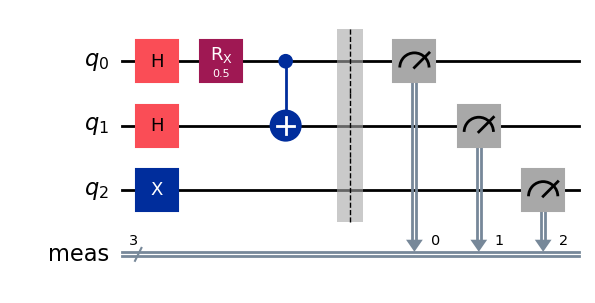

In [86]:
display(fig)

In [89]:
# save to file
fig.savefig("quantum_circuit.pdf", backend="pgf")

You can set various style of the gate, line, measurement in the drawing.

### Latex 

The renderer requires latex program in the system.
You can install the next latex packages.

- TexLive
- MiKTeX
- TinyTex

In addition, the poppler library is required for renderer.

In [ ]:
# Latex as lenderer
# qc.draw(output="latex")